In [0]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.font_manager import FontProperties


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv(r"drive/My Drive/Colab Notebooks/train.csv", encoding="big5")

df['Y1'] = df['Y1'].map({'Y':1, 'N':0})
df_cp = df.copy()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#多個類別轉0,1
def mulClass_to_01(df_ts):
  df_ts = df_ts.transform(lambda x: 0 if x == 0 else 1)
  return df_ts

In [0]:
#Y,N轉0,1
def YN_to_01(df_ts):
  df_ts = df_ts.map({'Y':1, 'N':0})
  return df_ts

1    56686
0    43314
Name: AG_CNT, dtype: int64


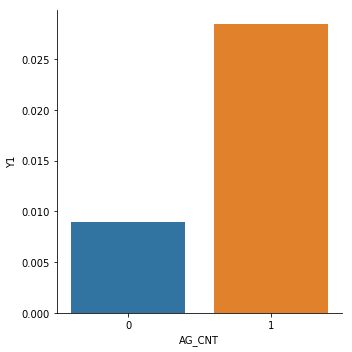

In [0]:
df_cp['AG_CNT'] = mulClass_to_01(df_cp['AG_CNT'])
print(df_cp['AG_CNT'].value_counts())
sns.catplot(x="AG_CNT", y="Y1", kind="bar", data=df_cp, ci=None)

0    64719
1    35281
Name: AG_NOW_CNT, dtype: int64


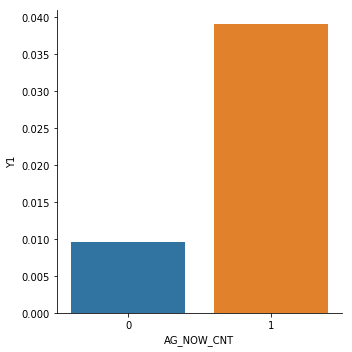

In [0]:
df_cp['AG_NOW_CNT'] = mulClass_to_01(df_cp['AG_NOW_CNT'])
print(df_cp['AG_NOW_CNT'].value_counts())
sns.catplot(x="AG_NOW_CNT", y="Y1", kind="bar", data=df_cp, ci=None)

0    56179
1    43821
Name: CLC_CUR_NUM, dtype: int64


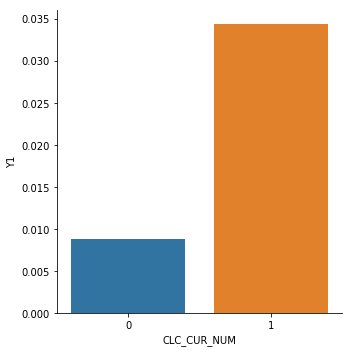

In [0]:
df_cp['CLC_CUR_NUM'] = mulClass_to_01(df_cp['CLC_CUR_NUM'])
print(df_cp['CLC_CUR_NUM'].value_counts())
sns.catplot(x="CLC_CUR_NUM", y="Y1", kind="bar", data=df_cp, ci=None)

0    68792
1    31208
Name: TOOL_VISIT_1YEAR_CNT, dtype: int64


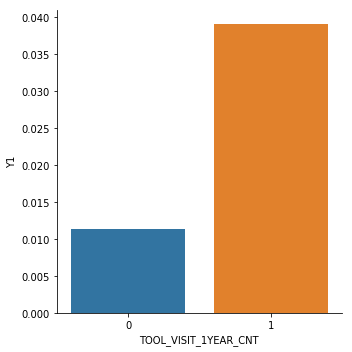

In [0]:
df_cp['TOOL_VISIT_1YEAR_CNT'] = mulClass_to_01(df_cp['TOOL_VISIT_1YEAR_CNT'])
print(df_cp['TOOL_VISIT_1YEAR_CNT'].value_counts())
sns.catplot(x="TOOL_VISIT_1YEAR_CNT", y="Y1", kind="bar", data=df_cp, ci=None)

0    75242
1    24758
Name: IF_ADD_IND, dtype: int64


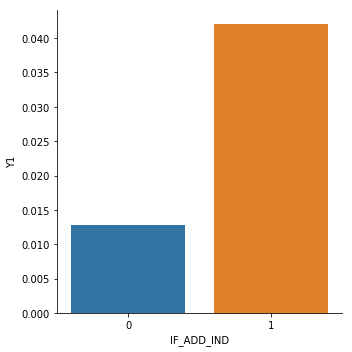

In [0]:
df_cp['IF_ADD_IND'] = YN_to_01(df_cp['IF_ADD_IND'])
print(df_cp['IF_ADD_IND'].value_counts())
sns.catplot(x="IF_ADD_IND", y="Y1", kind="bar", data=df_cp, ci=None)

In [0]:
def IM_CNT(df_ts):
  df_ts['IM_CNT'] = df_ts['IM_CNT'].transform(lambda x: 0 if x == 0 else(0.25 if x == 1 else(0.5 if x == 2 else(0.75 if x == 3 else 1))))
  return df_ts

0.00    71780
0.25    19964
0.50     6414
0.75     1782
1.00       60
Name: IM_CNT, dtype: int64


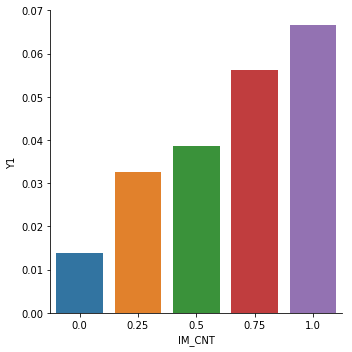

In [0]:
df_cp = IM_CNT(df_cp)
print(df_cp['IM_CNT'].value_counts())
sns.catplot(x="IM_CNT", y="Y1", kind="bar", data=df_cp, ci=None)